In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
digits.data.shape 

(1797, 64)

In [32]:
digits.images.shape # 8x8 px

(1797, 8, 8)

In [37]:
digits.images[0]

array([[20., 20., 20., 20., 20., 20., 20., 20.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

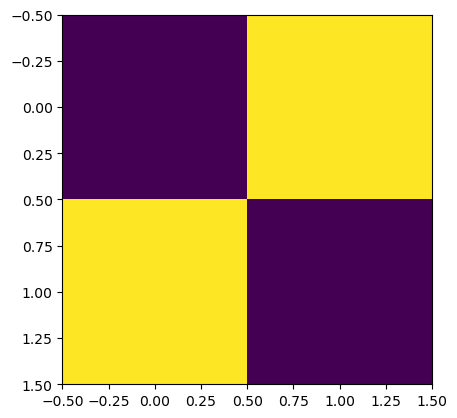

In [38]:
X = np.array([
    [0, 20],
    [20, 0]
])
plt.imshow(X)

In [6]:
digits.data[0].shape

(64,)

In [7]:
digits.images[0] # each px has color value from 0->15

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

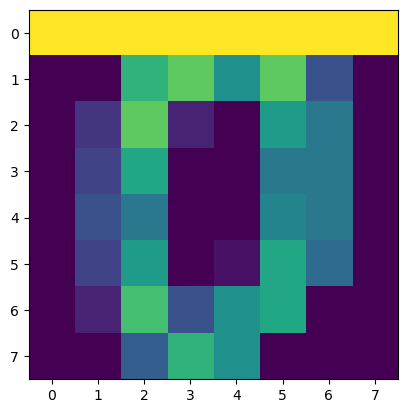

In [40]:
mock_img = digits.images[0]
mock_img[0] = 20 # value of brightness ( not hue )
# plt.imshow(digits.images[0], cmap='gray_r')
plt.imshow(mock_img, cmap='viridis')

In [9]:
digits.data[0] 
# plt.imshow(digits.data[0].ravel())

array([20., 20., 20., 20., 20., 20., 20., 20.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [10]:
digits.target[:5]

array([0, 1, 2, 3, 4])

In [11]:
np.unique(digits.target)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
np.isnan(digits.images).sum()

0

# Display Images

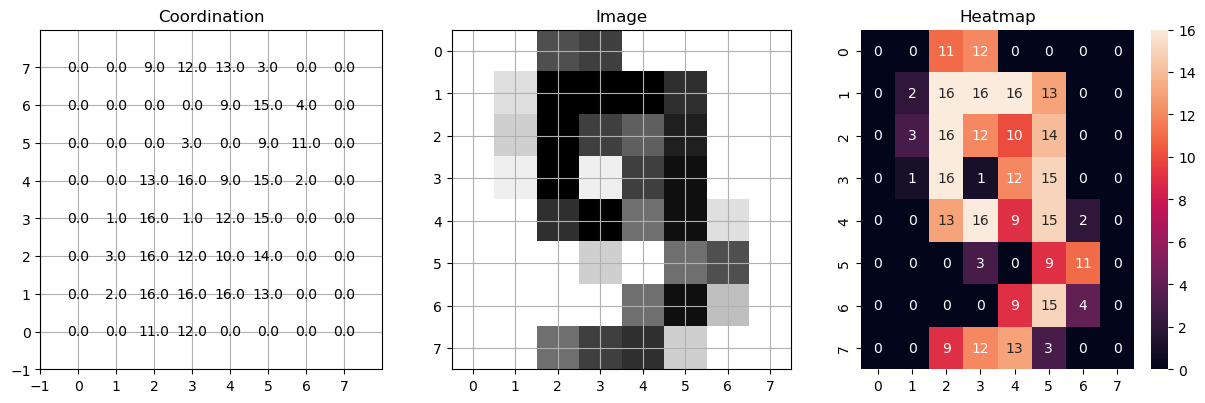

In [13]:
img = digits.images[9]

plt.figure(figsize=(15,15))
# print(img)
plt.subplot(331, xlim=(0,8), ylim=(0,8), )
plt.title('Coordination')
plt.grid()
plt.xticks(np.arange(-1,8))
plt.yticks(np.arange(-1,8))
for i in range(len(img)):
    for j in range(len(img[:,])):
        # print(img[i][j], end=' || ')
        t_img = img.T
        plt.annotate(f'{t_img[j][i]}', xy=(j,i),
                    ha='center', va='center')
        # print('(i,j) = ({},{})'.format(i,j))
        # Index 
        # plt.annotate(f'{j},{i}', xy=(j,i))
    # print('-------')
plt.subplot(332)
plt.title('Image')
plt.imshow(img, cmap='gray_r')
plt.grid(which='both')
plt.xticks(np.arange(0,8,1))
plt.yticks(np.arange(0,8,1))

plt.subplot(333)
plt.title('Heatmap')
import seaborn as sns
sns.heatmap(img, annot=True)
plt.show()

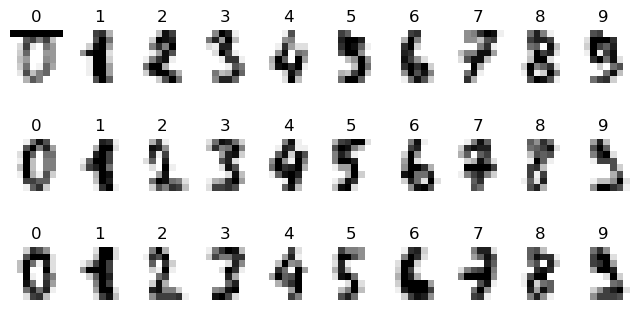

In [14]:
import math
def visual_multi(idx_start=0, n_plots=30):
    n_plots = n_plots 
    k = n_plots / 10  
    k = math.ceil(k)
    # print(k)
    fig = plt.figure(figsize=(8,4))
    for j in range(n_plots):
        plt.subplot(k,10,j+1)
        plt.imshow(digits.images[idx_start+j], cmap='gray_r')
        # print(i+j) # yield 0, 1,2, ..., 39
        plt.title(digits.target[idx_start+j])
        plt.axis('off')
        
    # fig.subplots_adjust(0,0,1,1)
visual_multi()

In [15]:
n_samples = len(digits.images)
n_samples

1797

In [16]:
X = digits.images.reshape([n_samples, -1])
X.shape, digits.images.shape, digits.data.shape

((1797, 64), (1797, 8, 8), (1797, 64))

In [17]:
X[0].shape

(64,)

In [18]:
X[:1]

array([[20., 20., 20., 20., 20., 20., 20., 20.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [19]:
y = digits.target
y[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [20]:
digits.data[:1]

array([[20., 20., 20., 20., 20., 20., 20., 20.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=.4, 
                                                   random_state=20)
X_train.shape,  X_test.shape

((1078, 64), (719, 64))

In [22]:
from sklearn import svm
model = svm.SVC(gamma='scale')
model.fit(X_train, y_train)


SVC()

In [23]:
y_pred = model.predict(X_test)
y_pred[:10]

array([0, 7, 9, 5, 8, 1, 3, 3, 7, 0])

In [24]:
y_test[:10]

array([0, 7, 9, 5, 8, 1, 3, 3, 7, 0])

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix\

print('Accuracy Score : {}'.format(accuracy_score(y_test, y_pred).round(2)))
print(classification_report(y_test, y_pred))

confusion_matrix(y_test, y_pred)

Accuracy Score : 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        63
           3       1.00      0.95      0.97        80
           4       1.00      0.99      0.99        75
           5       0.96      0.99      0.97        71
           6       1.00      0.99      0.99        71
           7       0.95      0.99      0.97        80
           8       0.94      1.00      0.97        64
           9       0.97      0.94      0.95        77

    accuracy                           0.98       719
   macro avg       0.98      0.98      0.98       719
weighted avg       0.98      0.98      0.98       719



array([[63,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 75,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 63,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 76,  0,  1,  0,  1,  2,  0],
       [ 0,  0,  0,  0, 74,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 70,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 70,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 79,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 64,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  3,  1, 72]])

In [26]:
import scikitplot as skplot
skplot.metrics.plot_confusion_matrix(y_test, y_pred, 
                                    cmap=plt.cm.gist_ncar_r,
                                    )
plt.show()

ModuleNotFoundError: No module named 'scikitplot'

In [27]:
idx_miss = np.where(y_test != y_pred)
idx_miss

(array([ 98, 111, 268, 338, 351, 427, 434, 449, 470, 523, 562, 638, 657]),)

In [28]:
y_test[idx_miss]

array([9, 5, 3, 4, 9, 3, 6, 7, 3, 3, 9, 9, 9])

In [29]:
y_pred[idx_miss] # what number model false predicted

array([8, 9, 8, 8, 5, 5, 5, 9, 7, 8, 7, 7, 7])

Predicted val : 8
Corrected val : 9


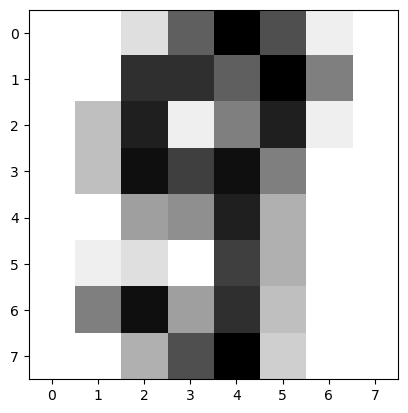

In [30]:
print('Predicted val : %s' % y_pred[idx_miss][0])
print('Corrected val : %s' % y_test[idx_miss][0])
plt.imshow(X_test[idx_miss][0].reshape(8,8), 
          cmap='gray_r')
plt.show()

In [31]:
from sklearn.model_selection import cross_val_score

cvs = cross_val_score(model, X, y, cv=10)
print(cvs.mean().round(4))


0.9694
